# Bode Plot

Demonstrate the contruction of a Bode Plot using the  [Python Control Systems Library](https://github.com/python-control/python-control).  

### How to Specify a Transfer Function

Given a transfer function with time delay

$$G_p(s) = \frac{0.2 e^{-0.25s}}{s^2 + 0.5 s + 1}$$

the task is to construct a Bode plot.

The Python Control Systems Library does not provide a specific representation for time delay. It does, however, provide a function `pade` for creating Pade approximations to time delay systems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from control.matlab import *

(num_delay,den_delay) = pade(0.25,3)

Gp = tf([0.2],[1, 0.5, 1])*tf(num_delay,den_delay)
Gp


         -0.2 s^3 + 9.6 s^2 - 192 s + 1536
---------------------------------------------------
s^5 + 48.5 s^4 + 985 s^3 + 8208 s^2 + 4800 s + 7680

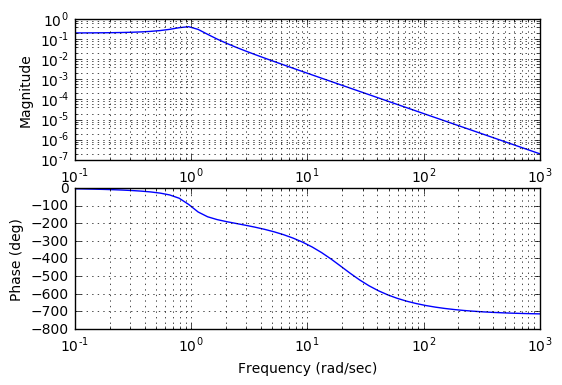

In [2]:
mag,phase,omega = bode(Gp);

### Specify Frequency Range

The default frequency range created by `bode` is often too wide. Fortunately, it is possible to specify the frequency axis in radians using the `numpy.logspace` function.

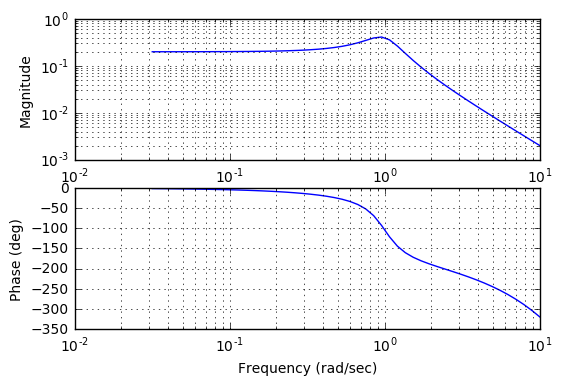

In [3]:
w = np.logspace(-1.5,1)
mag,phase,omega = bode(Gp,w)

### Set Plotting Options

Bode plots can be customized with several key options, as demonstrated here.

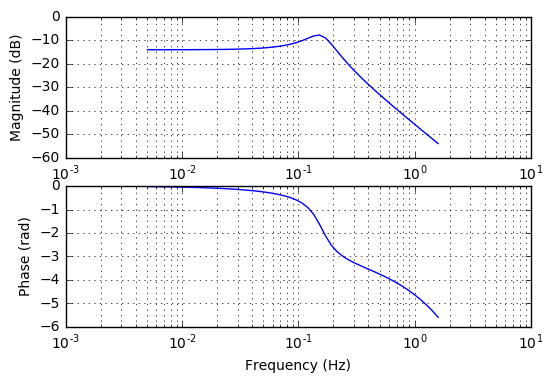

In [4]:
mag,phase,omega = bode(Gp,w,Hz=True,dB=True,deg=False)

### Adding Features to the Bode Plot

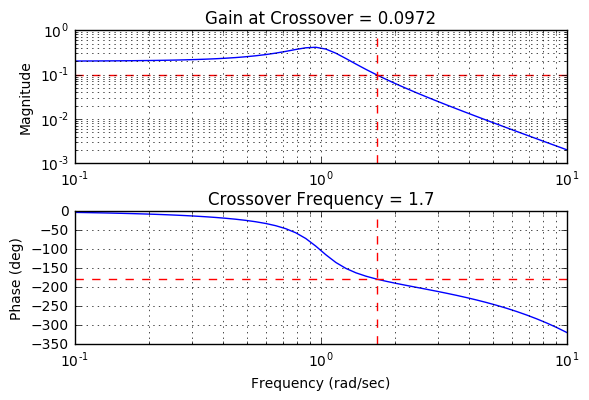

In [5]:
w = np.logspace(-1,1)
mag,phase,omega = bode(Gp,w)
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
gc = np.interp(wc,omega,mag)

# get the subplots axes
ax1,ax2 = plt.gcf().axes

# add features to the magnitude plot
plt.sca(ax1)
plt.plot([omega[0],omega[-1]],[gc,gc],'r--')
[gmin,gmax] = plt.ylim()
plt.plot([wc,wc],[gmin,gmax],'r--')
plt.title("Gain at Crossover = {0:.3g}".format(gc))

# add features to the phase plot
plt.sca(ax2)
plt.plot([omega[0],omega[-1]],[-180,-180],'r--')
[pmin,pmax] = plt.ylim()
plt.plot([wc,wc],[pmin,pmax],'r--')
plt.title("Crossover Frequency = {0:.3g}".format(wc))